<a href="https://colab.research.google.com/github/martinpovolny/colaboratory/blob/master/hidden_layer_power.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pylab as plt 
import pandas as pd


In [0]:
import ipywidgets as widgets
from IPython.display import display



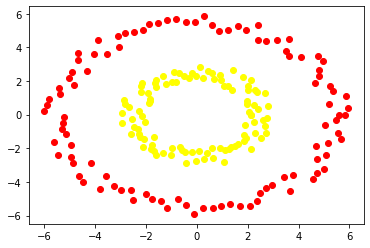

In [0]:
num_samples = 100
theta = np.linspace(0, 2*np.pi, num_samples)
r = np.random.rand((num_samples))+5
x, y = r * np.cos(theta), r * np.sin(theta)

theta2 = np.linspace(0, 2*np.pi, num_samples)
r2 = np.random.rand((num_samples))+2
x2, y2 = r2 * np.cos(theta), r2 * np.sin(theta2)


plt.scatter(x, y, color='red')
plt.scatter(x2, y2, color='yellow')





In [0]:
df = pd.DataFrame({
    'x1': np.concatenate((x, x2)), 
    'x2': np.concatenate((y, y2)),
    'klass': np.concatenate((
    np.ones((num_samples)), 
    np.zeros((num_samples))
    ))
    }) 
df.head()


,x1,x2,klass
0,5.827678,0.000000,1.0
1,5.954815,0.378440,1.0
2,5.185494,0.661768,1.0
3,5.870360,1.131419,1.0
4,5.366318,1.392367,1.0


In [0]:
import tensorflow as tf

from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense; # Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization;


In [0]:
def build_nn(number_hiden):
  model = Sequential()    
  model.add(Dense(number_hiden, activation='sigmoid', input_shape=(2,)))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam')
  model.summary()

  return model

In [0]:
hidd_slider = widgets.IntSlider(
    value=7,
    min=1,
    max=12,
    step=1,
    description='Hidden neurons:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(hidd_slider)



IntSlider(value=7, continuous_update=False, description='Hidden neurons:', max=12, min=1)

In [0]:
m = build_nn(hidd_slider.value)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 7)                 21        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


In [0]:
m.fit( df[['x1', 'x2']], df[['klass']], epochs=300, verbose=0)


In [0]:
#predicted = m.predict_proba(df[['x1', 'x2']])
predicted = m.predict_classes(df[['x1', 'x2']])

In [0]:
# predicted
confusion = tf.math.confusion_matrix(
    df['klass'],
    predicted,
    num_classes=2
#    weights=None,
#    dtype=tf.dtypes.int32,
#    name=None
)

In [0]:
with tf.Session():
   print('Confusion Matrix: \n\n', tf.Tensor.eval(confusion,feed_dict=None, session=None))

Confusion Matrix: 

 [[100   0]
 [  1  99]]


In [0]:
class1 = df[predicted == 1]
class0 = df[predicted == 0]

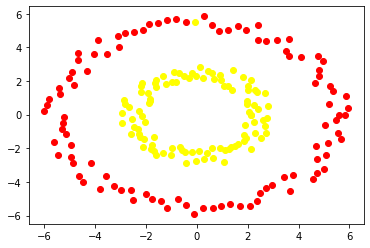

In [0]:
plt.scatter(class1[['x1']], class1[['x2']], color='red')
plt.scatter(class0[['x1']], class0[['x2']], color='yellow')

In [0]:
#pd.concat([df, predicted])
df_all = df.copy()
df_all.insert(2, 'predicted', predicted)
df_all.describe()
df_all.head(200)

,x1,x2,predicted,klass
0,5.827678,0.000000e+00,1,1.0
1,5.954815,3.784396e-01,1,1.0
2,5.185494,6.617684e-01,1,1.0
3,5.870360,1.131419e+00,1,1.0
4,5.366318,1.392367e+00,1,1.0
...,...,...,...,...
195,2.666527,-6.918681e-01,0,0.0
196,2.259061,-4.353984e-01,0,0.0
197,2.611017,-3.332158e-01,0,0.0
198,2.755368,-1.751088e-01,0,0.0


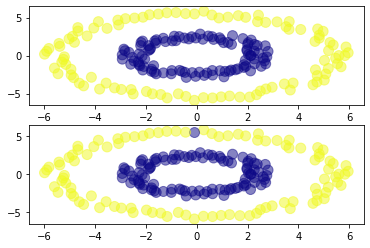

In [0]:
#plt.subplots(1, 2)
plt.subplot(2, 1, 1)
plt.scatter(df_all['x1'], df_all['x2'], c=df_all['klass'], cmap='plasma', s=100, alpha=0.5)
#plt.axes().set_aspect(1)

plt.subplot(2, 1, 2)
plt.scatter(df_all['x1'], df_all['x2'], c=df_all['predicted'], cmap='plasma', s=100, alpha=0.5)
#plt.axes().set_aspect(1)
